In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)

In [3]:
admission = pd.read_csv('data/ADMISSIONS.csv',parse_dates = ['ADMITTIME','DISCHTIME','DEATHTIME',
                                                            'EDREGTIME','EDOUTTIME'])

In [4]:
admission = admission.drop(columns= ['HAS_CHARTEVENTS_DATA','DEATHTIME','DISCHARGE_LOCATION','DIAGNOSIS',
                                    'HAS_CHARTEVENTS_DATA','EDREGTIME','EDOUTTIME'])

In [5]:
admission.dtypes

ROW_ID                           int64
SUBJECT_ID                       int64
HADM_ID                          int64
ADMITTIME               datetime64[ns]
DISCHTIME               datetime64[ns]
ADMISSION_TYPE                  object
ADMISSION_LOCATION              object
INSURANCE                       object
LANGUAGE                        object
RELIGION                        object
MARITAL_STATUS                  object
ETHNICITY                       object
HOSPITAL_EXPIRE_FLAG             int64
dtype: object

In [6]:
admission.shape

(58976, 13)

In [7]:
admission.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,HOSPITAL_EXPIRE_FLAG
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,0
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NaN,CATHOLIC,MARRIED,WHITE,0
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,0
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,0
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,0


In [8]:
admission.HOSPITAL_EXPIRE_FLAG.value_counts()

0    53122
1     5854
Name: HOSPITAL_EXPIRE_FLAG, dtype: int64

In [9]:
services = pd.read_csv('data/SERVICES.csv')
services.head()

,ROW_ID,SUBJECT_ID,HADM_ID,TRANSFERTIME,PREV_SERVICE,CURR_SERVICE
0,758,471,135879,2122-07-22 14:07:27,TSURG,MED
1,759,471,135879,2122-07-26 18:31:49,MED,TSURG
2,760,472,173064,2172-09-28 19:22:15,NaN,CMED
3,761,473,129194,2201-01-09 20:16:45,NaN,NB
4,762,474,194246,2181-03-23 08:24:41,NaN,NB


In [10]:
services.shape

(73343, 6)

In [11]:
services.CURR_SERVICE.value_counts()

MED      24866
CMED      9135
CSURG     7911
NB        7806
SURG      5514
NSURG     4100
TRAUM     3137
NMED      2957
OMED      2286
VSURG     1455
TSURG     1338
ORTHO     1101
GU         436
NBB        346
GYN        306
PSURG      283
ENT        247
OBS        113
DENT         5
PSYCH        1
Name: CURR_SERVICE, dtype: int64

In [12]:
service_admission_merge = pd.merge(admission,services[['SUBJECT_ID','HADM_ID','PREV_SERVICE','CURR_SERVICE']], 
                                   how = 'inner',on = ['SUBJECT_ID','HADM_ID'])
service_admission_merge.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,HOSPITAL_EXPIRE_FLAG,PREV_SERVICE,CURR_SERVICE
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,0,NaN,MED
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NaN,CATHOLIC,MARRIED,WHITE,0,NaN,CSURG
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,0,NaN,NSURG
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,0,NaN,CMED
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,0,NaN,CMED


In [13]:
patients = pd.read_csv('data/PATIENTS.csv',usecols = ['SUBJECT_ID','GENDER','DOB'],
                      parse_dates = ['DOB'])
patients

,SUBJECT_ID,GENDER,DOB
0,249,F,2075-03-13
1,250,F,2164-12-27
2,251,M,2090-03-15
3,252,M,2078-03-06
4,253,F,2089-11-26
...,...,...,...
46515,44089,M,2026-05-25
46516,44115,F,2124-07-27
46517,44123,F,2049-11-26
46518,44126,F,2076-07-25


In [14]:
ser_ad_pat_merge = pd.merge(service_admission_merge,patients,on =['SUBJECT_ID'],how ='inner')
ser_ad_pat_merge.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,HOSPITAL_EXPIRE_FLAG,PREV_SERVICE,CURR_SERVICE,GENDER,DOB
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,0,NaN,MED,F,2131-05-07
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NaN,CATHOLIC,MARRIED,WHITE,0,NaN,CSURG,M,2082-07-17
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,0,NaN,NSURG,M,2082-07-17
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,0,NaN,CMED,M,2100-05-31
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,0,NaN,CMED,M,2101-11-21


In [15]:
icu_stay = pd.read_csv('data/ICUSTAYS.csv',usecols = ['SUBJECT_ID','HADM_ID','FIRST_CAREUNIT',
                                          'LAST_CAREUNIT','FIRST_WARDID','LAST_WARDID',
                                          'LOS'])
icu_stay

,SUBJECT_ID,HADM_ID,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,LOS
0,268,110404,MICU,MICU,52,52,3.2490
1,269,106296,MICU,MICU,52,52,3.2788
2,270,188028,CCU,CCU,57,57,2.8939
3,271,173727,MICU,SICU,52,23,2.0600
4,272,164716,CCU,CCU,57,57,1.6202
...,...,...,...,...,...,...,...
61527,94944,143774,CSRU,CSRU,15,15,2.1894
61528,94950,123750,CCU,CCU,7,7,2.4942
61529,94953,196881,SICU,SICU,57,57,0.9259
61530,94954,118475,CSRU,CSRU,15,15,2.3346


In [16]:
icu_stay.dtypes

SUBJECT_ID          int64
HADM_ID             int64
FIRST_CAREUNIT     object
LAST_CAREUNIT      object
FIRST_WARDID        int64
LAST_WARDID         int64
LOS               float64
dtype: object

In [17]:
ser_as_pat_icu_merge = pd.merge(ser_ad_pat_merge,icu_stay,on =['HADM_ID','SUBJECT_ID'],how ='inner')
ser_as_pat_icu_merge = ser_as_pat_icu_merge.rename(columns={'LOS':'ICU_LOS'})
ser_as_pat_icu_merge

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,HOSPITAL_EXPIRE_FLAG,PREV_SERVICE,CURR_SERVICE,GENDER,DOB,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,ICU_LOS
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,0,NaN,MED,F,2131-05-07,MICU,MICU,52,52,1.1438
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NaN,CATHOLIC,MARRIED,WHITE,0,NaN,CSURG,M,2082-07-17,CSRU,CSRU,14,14,1.2641
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,0,NaN,NSURG,M,2082-07-17,SICU,SICU,57,57,1.1862
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,0,NaN,CMED,M,2100-05-31,CCU,CCU,7,7,0.5124
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,0,NaN,CMED,M,2101-11-21,CCU,CCU,7,7,3.5466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78835,58592,98794,190603,2127-11-07 11:00:00,2127-11-11 14:30:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,0,NaN,CSURG,M,2049-07-29,CSRU,CSRU,15,15,2.2888
78836,58593,98797,105447,2132-12-24 20:06:00,2132-12-25 12:00:00,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,1,NaN,MED,M,2044-12-27,MICU,MICU,50,50,1.2382
78837,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,0,NaN,TRAUM,F,2111-11-05,TSICU,TSICU,14,14,0.8778
78838,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,1,NaN,MED,F,2067-09-21,MICU,MICU,50,50,0.6202


In [18]:
#working_data = ser_as_pat_icu_merge.copy()

In [19]:
ser_as_pat_icu_merge['Target_LOS'] = (ser_as_pat_icu_merge.DISCHTIME - ser_as_pat_icu_merge.ADMITTIME)/np.timedelta64(1,'D')

In [20]:
(ser_as_pat_icu_merge.DISCHTIME - ser_as_pat_icu_merge.ADMITTIME)/np.timedelta64(1,'D')

0        1.144444
1        5.496528
2        6.768056
3        2.856944
4        3.534028
           ...   
78835    4.145833
78836    0.662500
78837    2.742361
78838    0.548611
78839    8.203472
Length: 78840, dtype: float64

In [21]:
ser_as_pat_icu_merge

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,HOSPITAL_EXPIRE_FLAG,PREV_SERVICE,CURR_SERVICE,GENDER,DOB,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,ICU_LOS,Target_LOS
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,0,NaN,MED,F,2131-05-07,MICU,MICU,52,52,1.1438,1.144444
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NaN,CATHOLIC,MARRIED,WHITE,0,NaN,CSURG,M,2082-07-17,CSRU,CSRU,14,14,1.2641,5.496528
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,0,NaN,NSURG,M,2082-07-17,SICU,SICU,57,57,1.1862,6.768056
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,0,NaN,CMED,M,2100-05-31,CCU,CCU,7,7,0.5124,2.856944
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,0,NaN,CMED,M,2101-11-21,CCU,CCU,7,7,3.5466,3.534028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78835,58592,98794,190603,2127-11-07 11:00:00,2127-11-11 14:30:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,0,NaN,CSURG,M,2049-07-29,CSRU,CSRU,15,15,2.2888,4.145833
78836,58593,98797,105447,2132-12-24 20:06:00,2132-12-25 12:00:00,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,1,NaN,MED,M,2044-12-27,MICU,MICU,50,50,1.2382,0.662500
78837,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,0,NaN,TRAUM,F,2111-11-05,TSICU,TSICU,14,14,0.8778,2.742361
78838,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,1,NaN,MED,F,2067-09-21,MICU,MICU,50,50,0.6202,0.548611


In [22]:
ser_as_pat_icu_merge['admit_time'] = [str(x).split(' ')[0] for x in ser_as_pat_icu_merge.ADMITTIME ]
    #or you can apply this below( datetime function) to do the same thing as the list comprehension
#pd.to_datetime(working_data.ADMITTIME).dt.date

In [23]:
# [x**2 for x in range(10)]
# for x in working_data.ADMITTIME:
    
#     x = str(x).split(' ')
#     print(x[0])
    

In [24]:
ser_as_pat_icu_merge['admit_time']= pd.to_datetime(ser_as_pat_icu_merge['admit_time']) 

In [25]:
ser_as_pat_icu_merge.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,HOSPITAL_EXPIRE_FLAG,PREV_SERVICE,CURR_SERVICE,GENDER,DOB,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,ICU_LOS,Target_LOS,admit_time
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,0,NaN,MED,F,2131-05-07,MICU,MICU,52,52,1.1438,1.144444,2196-04-09
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NaN,CATHOLIC,MARRIED,WHITE,0,NaN,CSURG,M,2082-07-17,CSRU,CSRU,14,14,1.2641,5.496528,2153-09-03
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,0,NaN,NSURG,M,2082-07-17,SICU,SICU,57,57,1.1862,6.768056,2157-10-18
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,0,NaN,CMED,M,2100-05-31,CCU,CCU,7,7,0.5124,2.856944,2139-06-06
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,0,NaN,CMED,M,2101-11-21,CCU,CCU,7,7,3.5466,3.534028,2160-11-02


In [26]:
#pandas.isnull(pandas.NaT)
ser_as_pat_icu_merge.DOB.isnull().sum()

0

In [27]:
ser_as_pat_icu_merge.DOB =  pd.to_datetime(ser_as_pat_icu_merge.DOB).dt.date
ser_as_pat_icu_merge.admit_time = pd.to_datetime(ser_as_pat_icu_merge.admit_time).dt.date

In [28]:
ser_as_pat_icu_merge.dtypes

ROW_ID                           int64
SUBJECT_ID                       int64
HADM_ID                          int64
ADMITTIME               datetime64[ns]
DISCHTIME               datetime64[ns]
ADMISSION_TYPE                  object
ADMISSION_LOCATION              object
INSURANCE                       object
LANGUAGE                        object
RELIGION                        object
MARITAL_STATUS                  object
ETHNICITY                       object
HOSPITAL_EXPIRE_FLAG             int64
PREV_SERVICE                    object
CURR_SERVICE                    object
GENDER                          object
DOB                             object
FIRST_CAREUNIT                  object
LAST_CAREUNIT                   object
FIRST_WARDID                     int64
LAST_WARDID                      int64
ICU_LOS                        float64
Target_LOS                     float64
admit_time                      object
dtype: object

In [29]:
#df['date_of_admission'] = pd.to_datetime(df['date_of_admission']).dt.date

#df['DOB'] = pd.to_datetime(df['DOB']).dt.date

#df['age'] = ((df['date_of_admission']-df['DOB']).dt.days) //365

In [30]:
#df['age'] = df.apply(lambda e: (e['date_of_admission'] - e['DOB']).days/365, axis=1)


In [31]:
ser_as_pat_icu_merge['AGE'] = ser_as_pat_icu_merge.apply(lambda e: (e['admit_time']-e['DOB']).days/365,axis=1)

In [32]:
ser_as_pat_icu_merge[['admit_time','DOB','AGE']]

,admit_time,DOB,AGE
0,2196-04-09,2131-05-07,64.969863
1,2153-09-03,2082-07-17,71.178082
2,2157-10-18,2082-07-17,75.304110
3,2139-06-06,2100-05-31,39.041096
4,2160-11-02,2101-11-21,58.989041
...,...,...,...
78835,2127-11-07,2049-07-29,78.326027
78836,2132-12-24,2044-12-27,88.049315
78837,2131-03-30,2111-11-05,19.410959
78838,2151-03-05,2067-09-21,83.506849


In [33]:
ser_as_pat_icu_merge['AGE'][ser_as_pat_icu_merge['AGE']>=100].sort_values()

8        300.200000
53321    300.200000
53383    300.200000
53384    300.200000
53401    300.200000
            ...    
13736    310.342466
13737    310.378082
51321    310.484932
51323    311.767123
51322    311.767123
Name: AGE, Length: 3312, dtype: float64

In [34]:
#(df['date_1'] - df['date_2']).dt.days
#(working_data.DISCHTIME - working_data.ADMITTIME)/np.timedelta64(1,'D')

In [35]:
ser_as_pat_icu_merge

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,HOSPITAL_EXPIRE_FLAG,PREV_SERVICE,CURR_SERVICE,GENDER,DOB,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,ICU_LOS,Target_LOS,admit_time,AGE
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,0,NaN,MED,F,2131-05-07,MICU,MICU,52,52,1.1438,1.144444,2196-04-09,64.969863
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NaN,CATHOLIC,MARRIED,WHITE,0,NaN,CSURG,M,2082-07-17,CSRU,CSRU,14,14,1.2641,5.496528,2153-09-03,71.178082
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,0,NaN,NSURG,M,2082-07-17,SICU,SICU,57,57,1.1862,6.768056,2157-10-18,75.304110
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,0,NaN,CMED,M,2100-05-31,CCU,CCU,7,7,0.5124,2.856944,2139-06-06,39.041096
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,0,NaN,CMED,M,2101-11-21,CCU,CCU,7,7,3.5466,3.534028,2160-11-02,58.989041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78835,58592,98794,190603,2127-11-07 11:00:00,2127-11-11 14:30:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,0,NaN,CSURG,M,2049-07-29,CSRU,CSRU,15,15,2.2888,4.145833,2127-11-07,78.326027
78836,58593,98797,105447,2132-12-24 20:06:00,2132-12-25 12:00:00,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,1,NaN,MED,M,2044-12-27,MICU,MICU,50,50,1.2382,0.662500,2132-12-24,88.049315
78837,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,0,NaN,TRAUM,F,2111-11-05,TSICU,TSICU,14,14,0.8778,2.742361,2131-03-30,19.410959
78838,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,1,NaN,MED,F,2067-09-21,MICU,MICU,50,50,0.6202,0.548611,2151-03-05,83.506849


In [36]:
ser_as_pat_icu_merge.shape

(78840, 25)

In [74]:
#missing data
total = ser_as_pat_icu_merge.isnull().sum().sort_values(ascending=False)
percent = (ser_as_pat_icu_merge.isnull().sum()/ser_as_pat_icu_merge.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data

,Total,Percent
PREV_SERVICE,61248,0.776865
LANGUAGE,31914,0.404795
MARITAL_STATUS,10847,0.137582
RELIGION,596,0.007560
ICU_LOS,10,0.000127
AGE,0,0.000000
SUBJECT_ID,0,0.000000
HADM_ID,0,0.000000
ADMITTIME,0,0.000000
DISCHTIME,0,0.000000


In [38]:
working_data = ser_as_pat_icu_merge.copy()

In [39]:
working_data

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,HOSPITAL_EXPIRE_FLAG,PREV_SERVICE,CURR_SERVICE,GENDER,DOB,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,ICU_LOS,Target_LOS,admit_time,AGE
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,0,NaN,MED,F,2131-05-07,MICU,MICU,52,52,1.1438,1.144444,2196-04-09,64.969863
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NaN,CATHOLIC,MARRIED,WHITE,0,NaN,CSURG,M,2082-07-17,CSRU,CSRU,14,14,1.2641,5.496528,2153-09-03,71.178082
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,0,NaN,NSURG,M,2082-07-17,SICU,SICU,57,57,1.1862,6.768056,2157-10-18,75.304110
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,0,NaN,CMED,M,2100-05-31,CCU,CCU,7,7,0.5124,2.856944,2139-06-06,39.041096
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,0,NaN,CMED,M,2101-11-21,CCU,CCU,7,7,3.5466,3.534028,2160-11-02,58.989041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78835,58592,98794,190603,2127-11-07 11:00:00,2127-11-11 14:30:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,0,NaN,CSURG,M,2049-07-29,CSRU,CSRU,15,15,2.2888,4.145833,2127-11-07,78.326027
78836,58593,98797,105447,2132-12-24 20:06:00,2132-12-25 12:00:00,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,1,NaN,MED,M,2044-12-27,MICU,MICU,50,50,1.2382,0.662500,2132-12-24,88.049315
78837,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,0,NaN,TRAUM,F,2111-11-05,TSICU,TSICU,14,14,0.8778,2.742361,2131-03-30,19.410959
78838,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,1,NaN,MED,F,2067-09-21,MICU,MICU,50,50,0.6202,0.548611,2151-03-05,83.506849


In [40]:
#df['month'] = pd.DatetimeIndex(df['birth_date']).month
working_data['admit_month']= pd.DatetimeIndex(working_data.ADMITTIME).month

In [41]:
def admission_season(x):
    if x in (3,4,5):
        season = 'SPRING'
    elif x in (6,7,8):
        season = 'SUMMER'
    elif x in (9,10,11):
        season = 'FALL'
    else:
        season = 'WINTER'
    return season

In [42]:
working_data['season'] = working_data['admit_month'].apply(admission_season)

In [43]:
working_data[['admit_month','season']][working_data.season=='SUMMER']

,admit_month,season
3,6,SUMMER
9,8,SUMMER
10,8,SUMMER
13,7,SUMMER
19,8,SUMMER
...,...,...
78813,6,SUMMER
78816,6,SUMMER
78828,6,SUMMER
78829,7,SUMMER


In [44]:
working_data.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,HOSPITAL_EXPIRE_FLAG,PREV_SERVICE,CURR_SERVICE,GENDER,DOB,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,ICU_LOS,Target_LOS,admit_time,AGE,admit_month,season
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,0,NaN,MED,F,2131-05-07,MICU,MICU,52,52,1.1438,1.144444,2196-04-09,64.969863,4,SPRING
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NaN,CATHOLIC,MARRIED,WHITE,0,NaN,CSURG,M,2082-07-17,CSRU,CSRU,14,14,1.2641,5.496528,2153-09-03,71.178082,9,FALL
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,0,NaN,NSURG,M,2082-07-17,SICU,SICU,57,57,1.1862,6.768056,2157-10-18,75.304110,10,FALL
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,0,NaN,CMED,M,2100-05-31,CCU,CCU,7,7,0.5124,2.856944,2139-06-06,39.041096,6,SUMMER
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,0,NaN,CMED,M,2101-11-21,CCU,CCU,7,7,3.5466,3.534028,2160-11-02,58.989041,11,FALL


In [45]:
working_data['admit_hour'] = pd.DatetimeIndex(working_data.ADMITTIME).hour

In [46]:
working_data

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,HOSPITAL_EXPIRE_FLAG,PREV_SERVICE,CURR_SERVICE,GENDER,DOB,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,ICU_LOS,Target_LOS,admit_time,AGE,admit_month,season,admit_hour
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,0,NaN,MED,F,2131-05-07,MICU,MICU,52,52,1.1438,1.144444,2196-04-09,64.969863,4,SPRING,12
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NaN,CATHOLIC,MARRIED,WHITE,0,NaN,CSURG,M,2082-07-17,CSRU,CSRU,14,14,1.2641,5.496528,2153-09-03,71.178082,9,FALL,7
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,0,NaN,NSURG,M,2082-07-17,SICU,SICU,57,57,1.1862,6.768056,2157-10-18,75.304110,10,FALL,19
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,0,NaN,CMED,M,2100-05-31,CCU,CCU,7,7,0.5124,2.856944,2139-06-06,39.041096,6,SUMMER,16
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,0,NaN,CMED,M,2101-11-21,CCU,CCU,7,7,3.5466,3.534028,2160-11-02,58.989041,11,FALL,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78835,58592,98794,190603,2127-11-07 11:00:00,2127-11-11 14:30:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,0,NaN,CSURG,M,2049-07-29,CSRU,CSRU,15,15,2.2888,4.145833,2127-11-07,78.326027,11,FALL,11
78836,58593,98797,105447,2132-12-24 20:06:00,2132-12-25 12:00:00,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,1,NaN,MED,M,2044-12-27,MICU,MICU,50,50,1.2382,0.662500,2132-12-24,88.049315,12,WINTER,20
78837,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,0,NaN,TRAUM,F,2111-11-05,TSICU,TSICU,14,14,0.8778,2.742361,2131-03-30,19.410959,3,SPRING,21
78838,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,1,NaN,MED,F,2067-09-21,MICU,MICU,50,50,0.6202,0.548611,2151-03-05,83.506849,3,SPRING,20


In [47]:
# Morning     5 am to 12 pm (noon)
# Early morning    5 to 8 am
# Late morning     11 am to 12pm
 
# Afternoon     12 pm to 5 pm
# Early afternoon   1 to 3pm
# Late afternoon    4 to 5pm
 
# Evening     5 pm to 9 pm
# Early evening   5 to 7 pm

# Night         9 pm to 4 am 
def time_of_day(day):
    if (day >=5) and (day <=12):
        return 'Morning'
    elif (day>12) and (day<=17):
        return 'Afternoon'
    elif (day >17) and (day <=21):
        return 'Evening'
    else:
        return 'Night'
    

In [48]:
working_data['admission part of day'] = working_data['admit_hour'].apply(time_of_day)

In [49]:
working_data[['admit_hour','admission part of day']][working_data['admission part of day'] =='Night']

,admit_hour,admission part of day
4,2,Night
6,22,Night
9,23,Night
10,23,Night
12,22,Night
...,...,...
78815,22,Night
78830,23,Night
78832,22,Night
78833,1,Night


In [50]:
working_data.columns.tolist()

['ROW_ID',
 'SUBJECT_ID',
 'HADM_ID',
 'ADMITTIME',
 'DISCHTIME',
 'ADMISSION_TYPE',
 'ADMISSION_LOCATION',
 'INSURANCE',
 'LANGUAGE',
 'RELIGION',
 'MARITAL_STATUS',
 'ETHNICITY',
 'HOSPITAL_EXPIRE_FLAG',
 'PREV_SERVICE',
 'CURR_SERVICE',
 'GENDER',
 'DOB',
 'FIRST_CAREUNIT',
 'LAST_CAREUNIT',
 'FIRST_WARDID',
 'LAST_WARDID',
 'ICU_LOS',
 'Target_LOS',
 'admit_time',
 'AGE',
 'admit_month',
 'season',
 'admit_hour',
 'admission part of day']

In [51]:
working_data['admission part of day'].value_counts()

Afternoon    22048
Morning      20060
Evening      18944
Night        17788
Name: admission part of day, dtype: int64

In [52]:
working_data = working_data.drop(columns= ['ADMITTIME','DISCHTIME','admit_month','admit_hour',
                                          'ICU_LOS','admit_time','PREV_SERVICE','HOSPITAL_EXPIRE_FLAG'])

In [53]:
working_data

,ROW_ID,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,CURR_SERVICE,GENDER,DOB,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,Target_LOS,AGE,season,admission part of day
0,21,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,MED,F,2131-05-07,MICU,MICU,52,52,1.144444,64.969863,SPRING,Morning
1,22,23,152223,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NaN,CATHOLIC,MARRIED,WHITE,CSURG,M,2082-07-17,CSRU,CSRU,14,14,5.496528,71.178082,FALL,Morning
2,23,23,124321,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NSURG,M,2082-07-17,SICU,SICU,57,57,6.768056,75.304110,FALL,Evening
3,24,24,161859,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,CMED,M,2100-05-31,CCU,CCU,7,7,2.856944,39.041096,SUMMER,Afternoon
4,25,25,129635,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,CMED,M,2101-11-21,CCU,CCU,7,7,3.534028,58.989041,FALL,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78835,58592,98794,190603,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,CSURG,M,2049-07-29,CSRU,CSRU,15,15,4.145833,78.326027,FALL,Morning
78836,58593,98797,105447,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,MED,M,2044-12-27,MICU,MICU,50,50,0.662500,88.049315,WINTER,Evening
78837,58594,98800,191113,EMERGENCY,CLINIC REFERRAL/PREMATURE,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,TRAUM,F,2111-11-05,TSICU,TSICU,14,14,2.742361,19.410959,SPRING,Evening
78838,58595,98802,101071,EMERGENCY,CLINIC REFERRAL/PREMATURE,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,MED,F,2067-09-21,MICU,MICU,50,50,0.548611,83.506849,SPRING,Evening


In [54]:
def age(age):
    if age >= 89:
        return 89 +(age -300)
    else:
        return age

In [55]:
working_data['AGE']= working_data['AGE'].apply(age)

In [56]:
working_data

,ROW_ID,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,CURR_SERVICE,GENDER,DOB,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,Target_LOS,AGE,season,admission part of day
0,21,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,MED,F,2131-05-07,MICU,MICU,52,52,1.144444,64.969863,SPRING,Morning
1,22,23,152223,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NaN,CATHOLIC,MARRIED,WHITE,CSURG,M,2082-07-17,CSRU,CSRU,14,14,5.496528,71.178082,FALL,Morning
2,23,23,124321,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NSURG,M,2082-07-17,SICU,SICU,57,57,6.768056,75.304110,FALL,Evening
3,24,24,161859,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,CMED,M,2100-05-31,CCU,CCU,7,7,2.856944,39.041096,SUMMER,Afternoon
4,25,25,129635,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,CMED,M,2101-11-21,CCU,CCU,7,7,3.534028,58.989041,FALL,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78835,58592,98794,190603,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,CSURG,M,2049-07-29,CSRU,CSRU,15,15,4.145833,78.326027,FALL,Morning
78836,58593,98797,105447,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,MED,M,2044-12-27,MICU,MICU,50,50,0.662500,88.049315,WINTER,Evening
78837,58594,98800,191113,EMERGENCY,CLINIC REFERRAL/PREMATURE,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,TRAUM,F,2111-11-05,TSICU,TSICU,14,14,2.742361,19.410959,SPRING,Evening
78838,58595,98802,101071,EMERGENCY,CLINIC REFERRAL/PREMATURE,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,MED,F,2067-09-21,MICU,MICU,50,50,0.548611,83.506849,SPRING,Evening


In [57]:
def unit_change(first,last):
    if first == last:
        return 1 #one being icu did not change
    if first != last:
        return 0
#this is how to apply a fun. with two arguements to two columns in dataframe
working_data['ICU_Change'] = working_data.apply(lambda row: unit_change(row['FIRST_CAREUNIT'],row['LAST_CAREUNIT']),
                                               axis = 1)

In [58]:
working_data['Ward_change'] = working_data.apply(lambda row: unit_change(row['FIRST_WARDID'],row['LAST_WARDID']),
                                                axis = 1)

In [59]:
working_data

,ROW_ID,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,CURR_SERVICE,GENDER,DOB,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,Target_LOS,AGE,season,admission part of day,ICU_Change,Ward_change
0,21,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,MED,F,2131-05-07,MICU,MICU,52,52,1.144444,64.969863,SPRING,Morning,1,1
1,22,23,152223,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NaN,CATHOLIC,MARRIED,WHITE,CSURG,M,2082-07-17,CSRU,CSRU,14,14,5.496528,71.178082,FALL,Morning,1,1
2,23,23,124321,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NSURG,M,2082-07-17,SICU,SICU,57,57,6.768056,75.304110,FALL,Evening,1,1
3,24,24,161859,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,CMED,M,2100-05-31,CCU,CCU,7,7,2.856944,39.041096,SUMMER,Afternoon,1,1
4,25,25,129635,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,CMED,M,2101-11-21,CCU,CCU,7,7,3.534028,58.989041,FALL,Night,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78835,58592,98794,190603,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,CSURG,M,2049-07-29,CSRU,CSRU,15,15,4.145833,78.326027,FALL,Morning,1,1
78836,58593,98797,105447,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,MED,M,2044-12-27,MICU,MICU,50,50,0.662500,88.049315,WINTER,Evening,1,1
78837,58594,98800,191113,EMERGENCY,CLINIC REFERRAL/PREMATURE,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,TRAUM,F,2111-11-05,TSICU,TSICU,14,14,2.742361,19.410959,SPRING,Evening,1,1
78838,58595,98802,101071,EMERGENCY,CLINIC REFERRAL/PREMATURE,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,MED,F,2067-09-21,MICU,MICU,50,50,0.548611,83.506849,SPRING,Evening,1,1


In [60]:
working_data = working_data.drop(columns= ['FIRST_CAREUNIT','LAST_CAREUNIT','FIRST_WARDID','LAST_WARDID'])

In [61]:
working_data

,ROW_ID,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,CURR_SERVICE,GENDER,DOB,Target_LOS,AGE,season,admission part of day,ICU_Change,Ward_change
0,21,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,MED,F,2131-05-07,1.144444,64.969863,SPRING,Morning,1,1
1,22,23,152223,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NaN,CATHOLIC,MARRIED,WHITE,CSURG,M,2082-07-17,5.496528,71.178082,FALL,Morning,1,1
2,23,23,124321,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NSURG,M,2082-07-17,6.768056,75.304110,FALL,Evening,1,1
3,24,24,161859,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,CMED,M,2100-05-31,2.856944,39.041096,SUMMER,Afternoon,1,1
4,25,25,129635,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,CMED,M,2101-11-21,3.534028,58.989041,FALL,Night,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78835,58592,98794,190603,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,CSURG,M,2049-07-29,4.145833,78.326027,FALL,Morning,1,1
78836,58593,98797,105447,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,MED,M,2044-12-27,0.662500,88.049315,WINTER,Evening,1,1
78837,58594,98800,191113,EMERGENCY,CLINIC REFERRAL/PREMATURE,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,TRAUM,F,2111-11-05,2.742361,19.410959,SPRING,Evening,1,1
78838,58595,98802,101071,EMERGENCY,CLINIC REFERRAL/PREMATURE,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,MED,F,2067-09-21,0.548611,83.506849,SPRING,Evening,1,1


In [68]:
print(working_data.MARITAL_STATUS.value_counts(dropna=False))
print(working_data.LANGUAGE.value_counts(dropna=False))
print(working_data.RELIGION.value_counts(dropna=False))

MARRIED              34506
SINGLE               17963
UNKNOWN (DEFAULT)    11324
WIDOWED               9768
DIVORCED              4449
SEPARATED              807
LIFE PARTNER            23
Name: MARITAL_STATUS, dtype: int64
ENGL             40521
NOT SPECIFIED    31914
SPAN              1528
RUSS              1082
PTUN               829
CANT               573
PORT               543
CAPE               348
MAND               212
HAIT               196
ITAL               181
VIET               129
GREE               116
CAMB                96
ARAB                63
PERS                58
POLI                48
AMER                47
HIND                37
KORE                25
ALBA                24
THAI                24
FREN                21
SOMA                18
ETHI                15
*ARM                12
*BEN                10
LAOT                10
*BUL                 9
*HUN                 9
* FU                 8
*YID                 8
*GUJ                 8
*CHI             

In [63]:
# LANGUAGE	31914	0.404795
# MARITAL_STATUS	10847	0.137582
# RELIGION	

In [64]:
working_data.RELIGION=working_data.RELIGION.fillna('NOT SPECIFIED')
working_data.MARITAL_STATUS=working_data.MARITAL_STATUS.fillna('UNKNOWN (DEFAULT)')

In [65]:
#nba["College"].fillna("No College", inplace = True) 
working_data['LANGUAGE']= working_data['LANGUAGE'].fillna('NOT SPECIFIED')

In [69]:
def language(x):
    if x in ('ENGL','SPAN','RUSS','PTUN','CANT','PORT','CAPE','MAND','HAIT','ITAL','VIET','GREE','NOT SPECIFIED'):
        return x
    else:
        return 'Others'

In [70]:
working_data['LANGUAGE']= working_data.LANGUAGE.apply(language)

In [71]:
working_data['LANGUAGE'].value_counts(dropna=False)

ENGL             40521
NOT SPECIFIED    31914
SPAN              1528
RUSS              1082
PTUN               829
Others             668
CANT               573
PORT               543
CAPE               348
MAND               212
HAIT               196
ITAL               181
VIET               129
GREE               116
Name: LANGUAGE, dtype: int64

In [73]:
working_data

,ROW_ID,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,CURR_SERVICE,GENDER,DOB,Target_LOS,AGE,season,admission part of day,ICU_Change,Ward_change
0,21,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,UNOBTAINABLE,MARRIED,WHITE,MED,F,2131-05-07,1.144444,64.969863,SPRING,Morning,1,1
1,22,23,152223,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NOT SPECIFIED,CATHOLIC,MARRIED,WHITE,CSURG,M,2082-07-17,5.496528,71.178082,FALL,Morning,1,1
2,23,23,124321,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NSURG,M,2082-07-17,6.768056,75.304110,FALL,Evening,1,1
3,24,24,161859,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NOT SPECIFIED,PROTESTANT QUAKER,SINGLE,WHITE,CMED,M,2100-05-31,2.856944,39.041096,SUMMER,Afternoon,1,1
4,25,25,129635,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,UNOBTAINABLE,MARRIED,WHITE,CMED,M,2101-11-21,3.534028,58.989041,FALL,Night,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78835,58592,98794,190603,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,CSURG,M,2049-07-29,4.145833,78.326027,FALL,Morning,1,1
78836,58593,98797,105447,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,MED,M,2044-12-27,0.662500,88.049315,WINTER,Evening,1,1
78837,58594,98800,191113,EMERGENCY,CLINIC REFERRAL/PREMATURE,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,TRAUM,F,2111-11-05,2.742361,19.410959,SPRING,Evening,1,1
78838,58595,98802,101071,EMERGENCY,CLINIC REFERRAL/PREMATURE,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,MED,F,2067-09-21,0.548611,83.506849,SPRING,Evening,1,1


In [75]:
#missing data
total = working_data.isnull().sum().sort_values(ascending=False)
percent = (working_data.isnull().sum()/working_data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data

,Total,Percent
Ward_change,0,0.0
MARITAL_STATUS,0,0.0
SUBJECT_ID,0,0.0
HADM_ID,0,0.0
ADMISSION_TYPE,0,0.0
ADMISSION_LOCATION,0,0.0
INSURANCE,0,0.0
LANGUAGE,0,0.0
RELIGION,0,0.0
ETHNICITY,0,0.0


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


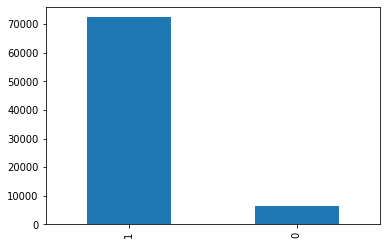

In [81]:
working_data.ICU_Change.value_counts().plot('bar')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


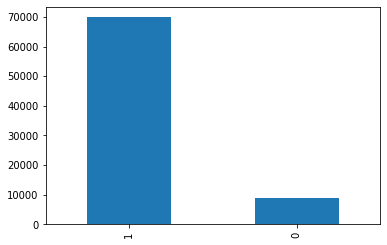

In [82]:
working_data.Ward_change.value_counts().plot('bar')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


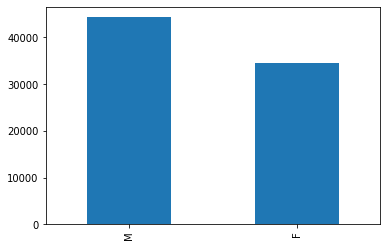

In [83]:
working_data.GENDER.value_counts().plot('bar')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


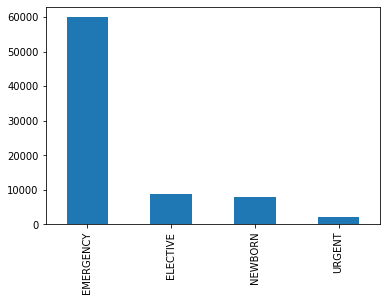

In [84]:
working_data.ADMISSION_TYPE.value_counts().plot('bar')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


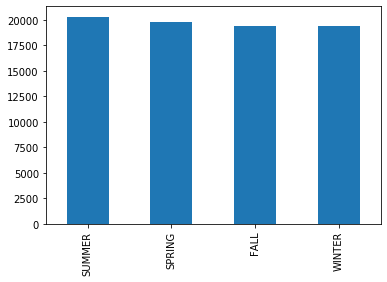

In [85]:
working_data.season.value_counts().plot('bar');

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


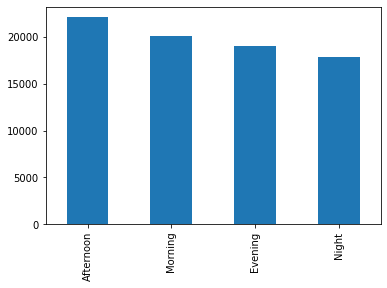

In [86]:
working_data['admission part of day'].value_counts().plot('bar');

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


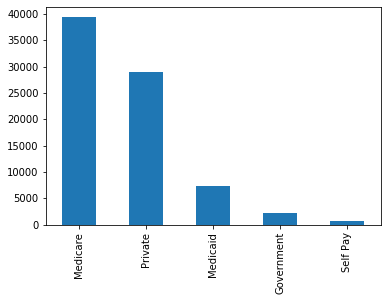

In [87]:
working_data.INSURANCE.value_counts().plot('bar');

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


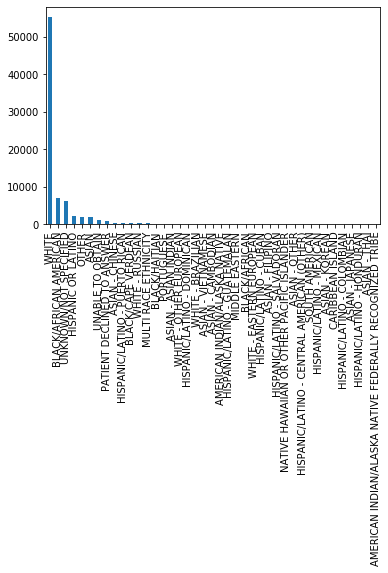

In [88]:
working_data.ETHNICITY.value_counts().plot('bar');

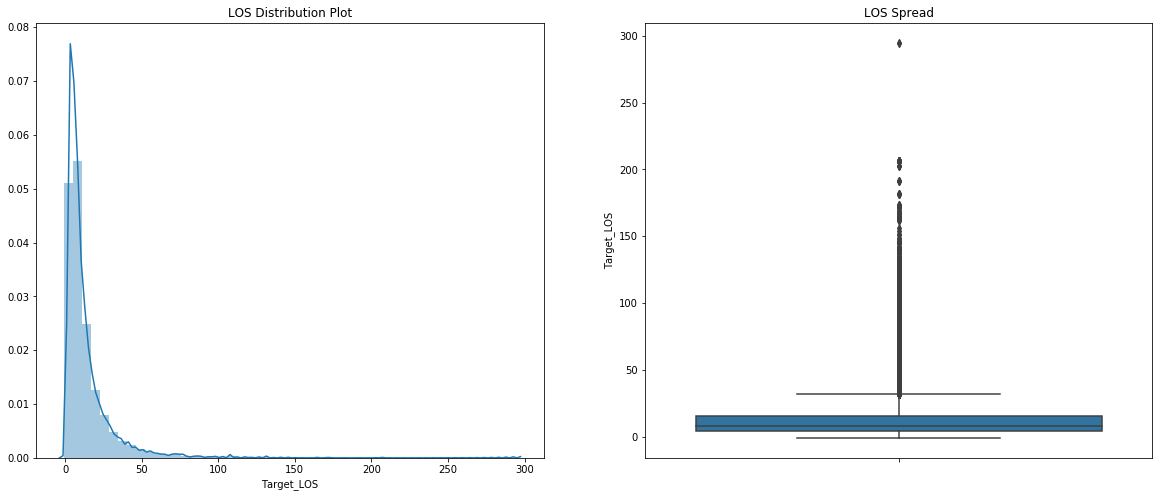

In [94]:
#see how los is distributed

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('LOS Distribution Plot')
sns.distplot(working_data.Target_LOS)

plt.subplot(1,2,2)
plt.title('LOS Spread')
sns.boxplot(y=working_data.Target_LOS);

In [95]:
working_data[working_data.Target_LOS<0]

,ROW_ID,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,CURR_SERVICE,GENDER,DOB,Target_LOS,AGE,season,admission part of day,ICU_Change,Ward_change
599,237,181,102631,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,PROTESTANT QUAKER,MARRIED,WHITE,CSURG,M,2088-07-24,-0.138889,65.260274,FALL,Morning,1,1
937,644,516,187482,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,NOT SPECIFIED,JEWISH,WIDOWED,UNKNOWN/NOT SPECIFIED,MED,F,2126-08-07,-0.797222,71.030137,SUMMER,Evening,1,1
2571,1640,1334,138015,NEWBORN,CLINIC REFERRAL/PREMATURE,Private,NOT SPECIFIED,PROTESTANT QUAKER,UNKNOWN (DEFAULT),WHITE,NB,M,2137-09-02,-0.113194,0.000000,FALL,Afternoon,1,1
2644,1699,1381,181430,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,NOT SPECIFIED,UNOBTAINABLE,MARRIED,WHITE,NMED,F,2107-07-15,-0.100694,81.526027,WINTER,Afternoon,1,1
3689,2935,2420,135098,EMERGENCY,EMERGENCY ROOM ADMIT,Medicaid,ENGL,CATHOLIC,SINGLE,WHITE,MED,F,2136-05-20,-0.109722,48.567123,WINTER,Evening,0,0
4413,3244,2677,108011,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,NOT SPECIFIED,NOT SPECIFIED,WIDOWED,WHITE,MED,F,1828-04-16,-0.019444,89.200000,SPRING,Morning,1,1
4414,3244,2677,108011,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,NOT SPECIFIED,NOT SPECIFIED,WIDOWED,WHITE,SURG,F,1828-04-16,-0.019444,89.200000,SPRING,Morning,1,1
4797,3447,2858,190088,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,NOT SPECIFIED,CATHOLIC,WIDOWED,WHITE,CMED,F,2026-03-13,-0.145139,82.591781,FALL,Afternoon,1,1
5281,3894,3229,161198,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,NOT SPECIFIED,UNOBTAINABLE,UNKNOWN (DEFAULT),WHITE,TRAUM,F,2060-01-25,-0.263194,74.895890,FALL,Evening,1,1
6124,4709,3915,198555,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,NOT SPECIFIED,UNOBTAINABLE,SINGLE,BLACK/AFRICAN AMERICAN,MED,M,2110-02-23,-0.188194,68.164384,SPRING,Afternoon,1,1


In [103]:
working_data.shape

(78751, 19)

In [102]:
# Drop LOS < 0 
working_data = working_data[working_data['Target_LOS']>=0]

In [110]:
working_data['ETHNICITY']=working_data['ETHNICITY'].str.lower()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [111]:
working_data.ETHNICITY.value_counts()

white                                                       55189
black/african american                                       6983
unknown/not specified                                        6155
hispanic or latino                                           2187
other                                                        1979
asian                                                        1813
unable to obtain                                             1108
patient declined to answer                                    694
asian - chinese                                               364
hispanic/latino - puerto rican                                302
black/cape verdean                                            282
white - russian                                               207
multi race ethnicity                                          167
black/haitian                                                 134
portuguese                                                    120
asian - as

In [113]:
def enthicity(e):
    if 'white' in e:
        return 'WHITE'
    elif 'black'in e:
        return 'BLACK/AFRICAN AMERICAN'
    elif 'hispanic' in e:
        return 'HISPANIC'
    elif 'asian' in e:
        return 'ASIAN'
    else:
        return 'OTHER'

In [119]:
working_data['ethnicity'] = working_data['ETHNICITY'].apply(enthicity)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [127]:
working_data['ethnicity'].value_counts()

WHITE                     55639
OTHER                     10385
BLACK/AFRICAN AMERICAN     7451
HISPANIC                   2762
ASIAN                      2514
Name: ethnicity, dtype: int64

In [130]:
working_data

,ROW_ID,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,CURR_SERVICE,GENDER,Target_LOS,AGE,season,admission part of day,ethnicity
0,21,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,UNOBTAINABLE,MARRIED,MED,F,1.144444,64.969863,SPRING,Morning,WHITE
1,22,23,152223,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NOT SPECIFIED,CATHOLIC,MARRIED,CSURG,M,5.496528,71.178082,FALL,Morning,WHITE
2,23,23,124321,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,ENGL,CATHOLIC,MARRIED,NSURG,M,6.768056,75.304110,FALL,Evening,WHITE
3,24,24,161859,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NOT SPECIFIED,PROTESTANT QUAKER,SINGLE,CMED,M,2.856944,39.041096,SUMMER,Afternoon,WHITE
4,25,25,129635,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,UNOBTAINABLE,MARRIED,CMED,M,3.534028,58.989041,FALL,Night,WHITE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78835,58592,98794,190603,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,ENGL,CATHOLIC,MARRIED,CSURG,M,4.145833,78.326027,FALL,Morning,WHITE
78836,58593,98797,105447,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,ENGL,CATHOLIC,WIDOWED,MED,M,0.662500,88.049315,WINTER,Evening,WHITE
78837,58594,98800,191113,EMERGENCY,CLINIC REFERRAL/PREMATURE,Private,ENGL,NOT SPECIFIED,SINGLE,TRAUM,F,2.742361,19.410959,SPRING,Evening,WHITE
78838,58595,98802,101071,EMERGENCY,CLINIC REFERRAL/PREMATURE,Medicare,ENGL,CATHOLIC,WIDOWED,MED,F,0.548611,83.506849,SPRING,Evening,WHITE


In [129]:
working_data = working_data.drop(columns= ['Ward_change','ICU_Change','DOB',
                                           'ETHNICITY'])

In [131]:
working_data['CURR_SERVICE'].value_counts()

MED      27274
CMED      9866
CSURG     8538
NB        7817
SURG      6165
NSURG     4183
TRAUM     3288
NMED      3143
OMED      2805
TSURG     1420
VSURG     1368
ORTHO     1140
GU         447
GYN        332
NBB        319
PSURG      271
ENT        241
OBS        128
DENT         5
PSYCH        1
Name: CURR_SERVICE, dtype: int64

In [135]:
#df['col1'].map(di) 
services = {'MED'        :'Medical',
              'CMED'       :'Cardiac',
              'CSURG'      :'Cardiac',
              'NB'         :'Newborn',
              'SURG'       :'Surgical',
              'NSURG'      :'Neurologic',
              'TRAUM'      :'Trauma',
              'NMED'       :'Neurologic',
              'OMED'       :'Orthopaedic',
              'TSURG'      :'Thoracic Surgical',
              'VSURG'      :'Vascular Surgical',
              'ORTHO'      :'Orthopaedic',
              'GU'         :'Genitourinary',
              'GYN'        :'Gynecological',
              'NBB'        :'Newborn',
              'PSURG'      :'Other',
              'ENT'        :'Ear, nose, and throat',
              'OBS'        :'Newborn',
              'DENT'       :'Other',
              'PSYCH'      :'Other'
            }

In [136]:
working_data['CURR_SERVICE']=working_data['CURR_SERVICE'].map(services)

In [139]:
working_data

,ROW_ID,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,CURR_SERVICE,GENDER,Target_LOS,AGE,season,admission part of day,ethnicity
0,21,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,UNOBTAINABLE,MARRIED,Medical,F,1.144444,64.969863,SPRING,Morning,WHITE
1,22,23,152223,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NOT SPECIFIED,CATHOLIC,MARRIED,Cardiac,M,5.496528,71.178082,FALL,Morning,WHITE
2,23,23,124321,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,ENGL,CATHOLIC,MARRIED,Neurologic,M,6.768056,75.304110,FALL,Evening,WHITE
3,24,24,161859,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NOT SPECIFIED,PROTESTANT QUAKER,SINGLE,Cardiac,M,2.856944,39.041096,SUMMER,Afternoon,WHITE
4,25,25,129635,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,UNOBTAINABLE,MARRIED,Cardiac,M,3.534028,58.989041,FALL,Night,WHITE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78835,58592,98794,190603,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,ENGL,CATHOLIC,MARRIED,Cardiac,M,4.145833,78.326027,FALL,Morning,WHITE
78836,58593,98797,105447,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,ENGL,CATHOLIC,WIDOWED,Medical,M,0.662500,88.049315,WINTER,Evening,WHITE
78837,58594,98800,191113,EMERGENCY,CLINIC REFERRAL/PREMATURE,Private,ENGL,NOT SPECIFIED,SINGLE,Trauma,F,2.742361,19.410959,SPRING,Evening,WHITE
78838,58595,98802,101071,EMERGENCY,CLINIC REFERRAL/PREMATURE,Medicare,ENGL,CATHOLIC,WIDOWED,Medical,F,0.548611,83.506849,SPRING,Evening,WHITE


In [140]:
working_data.to_csv('los_data.csv', index=False) 